In [2]:
#install kaggle
!pip install -q kaggle

In [8]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)




  0%|          | 0.00/428M [00:00<?, ?B/s]
  0%|          | 1.00M/428M [00:01<07:15, 1.03MB/s]
  0%|          | 2.00M/428M [00:01<04:07, 1.81MB/s]
  1%|          | 3.00M/428M [00:01<02:54, 2.56MB/s]
  1%|          | 4.00M/428M [00:01<02:02, 3.63MB/s]
  1%|1         | 5.00M/428M [00:01<01:34, 4.70MB/s]
  1%|1         | 6.00M/428M [00:01<01:40, 4.40MB/s]
  2%|1         | 8.00M/428M [00:02<01:05, 6.73MB/s]
  2%|2         | 9.00M/428M [00:02<01:00, 7.31MB/s]
  3%|2         | 11.0M/428M [00:02<00:49, 8.82MB/s]
  3%|2         | 12.0M/428M [00:02<00:48, 8.97MB/s]
  3%|3         | 13.0M/428M [00:02<00:51, 8.37MB/s]
  4%|3         | 15.0M/428M [00:02<00:46, 9.31MB/s]
  4%|3         | 16.0M/428M [00:02<00:46, 9.36MB/s]
  4%|4         | 18.0M/428M [00:03<00:37, 11.5MB/s]
  5%|4         | 20.0M/428M [00:03<00:42, 10.1MB/s]
  5%|5         | 22.0M/428M [00:03<00:46, 9.17MB/s]
  5%|5         | 23.0M/428M [00:03<00:48, 8.73MB/s]
  6%|5         | 25.0M/428M [00:03<00:40, 10.5MB/s]
  6%|6         | 27.

In [32]:
import zipfile

# Path to the downloaded zip file
zip_file_path = "toronto-emotional-speech-set-tess.zip"

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("output_directory")  # Specify the output directory


In [ ]:
# IMPORT MODULES

import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [35]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
import zipfile
with zipfile.ZipFile("toronto-emotional-speech-set-tess.zip", 'r') as zip_ref:
    zip_ref.extractall("output_directory")


Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
toronto-emotional-speech-set-tess.zip: Skipping, found more recently modified local copy (use --force to force download)


In [43]:
import os

paths = []
labels = []

# Directory path
base_directory = './output_directory'

for dirname, _, filenames in os.walk(base_directory):
    for filename in filenames:
        
        if filename.endswith('.wav'):
        
            paths.append(os.path.join(dirname, filename))
        
            label = filename.split('_')[-1].split('.')[0].lower()
            labels.append(label)

    # Stop if we've collected 2800 files
    if len(paths) == 2800:
        break

# Print summary
print(f"Total files collected: {len(paths)}")
print(f"Sample labels: {labels[:10]}")


Total files collected: 2800
Sample labels: ['angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry', 'angry']


In [45]:
len(paths)

2800

In [47]:
paths[:5]

['./output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [49]:
paths[:5]

['./output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [55]:
import pandas as pd

df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels

df.head()

,speech,label
0,./output_directory\TESS Toronto emotional spee...,angry
1,./output_directory\TESS Toronto emotional spee...,angry
2,./output_directory\TESS Toronto emotional spee...,angry
3,./output_directory\TESS Toronto emotional spee...,angry
4,./output_directory\TESS Toronto emotional spee...,angry


In [57]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

In [65]:
# Add the label count column
df['label_count'] = df['label'].map(df['label'].value_counts())

df = df.drop('label_count', axis=1)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   speech  2800 non-null   object
 1   label   2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB


<Axes: xlabel='label', ylabel='count'>

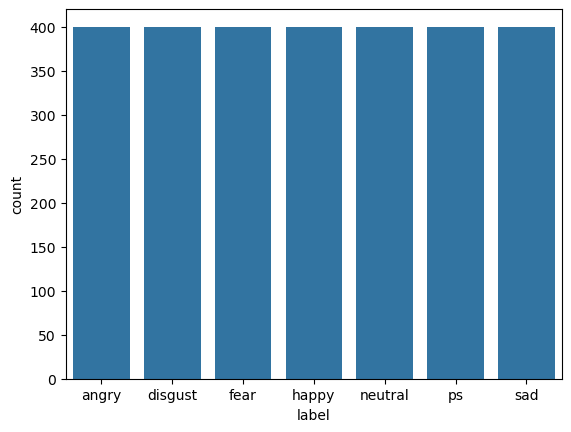

In [69]:
import seaborn as sns

sns.countplot(data=df, x='label')

In [71]:
df

,speech,label
0,./output_directory\TESS Toronto emotional spee...,angry
1,./output_directory\TESS Toronto emotional spee...,angry
2,./output_directory\TESS Toronto emotional spee...,angry
3,./output_directory\TESS Toronto emotional spee...,angry
4,./output_directory\TESS Toronto emotional spee...,angry
...,...,...
2795,./output_directory\TESS Toronto emotional spee...,sad
2796,./output_directory\TESS Toronto emotional spee...,sad
2797,./output_directory\TESS Toronto emotional spee...,sad
2798,./output_directory\TESS Toronto emotional spee...,sad


In [73]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

# Safely drop 'label_count' column if it exists
if 'label_count' in df.columns:
    df.drop('label_count', axis=1, inplace=True)

print(df.head())
print(df['label'].unique())

                                              speech  label
0  ./output_directory\TESS Toronto emotional spee...  angry
1  ./output_directory\TESS Toronto emotional spee...  angry
2  ./output_directory\TESS Toronto emotional spee...  angry
3  ./output_directory\TESS Toronto emotional spee...  angry
4  ./output_directory\TESS Toronto emotional spee...  angry
['angry' 'disgust' 'fear' 'happy' 'neutral' 'ps' 'sad']


In [75]:
df['speech'].unique()

array(['./output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
       './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
       './output_directory\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
       ...,
       './output_directory\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Sad\\OAF_yes_sad.wav',
       './output_directory\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Sad\\OAF_young_sad.wav',
       './output_directory\\TESS Toronto emotional speech set data\\TESS Toronto emotional speech set data\\OAF_Sad\\OAF_youth_sad.wav'],
      dtype=object)

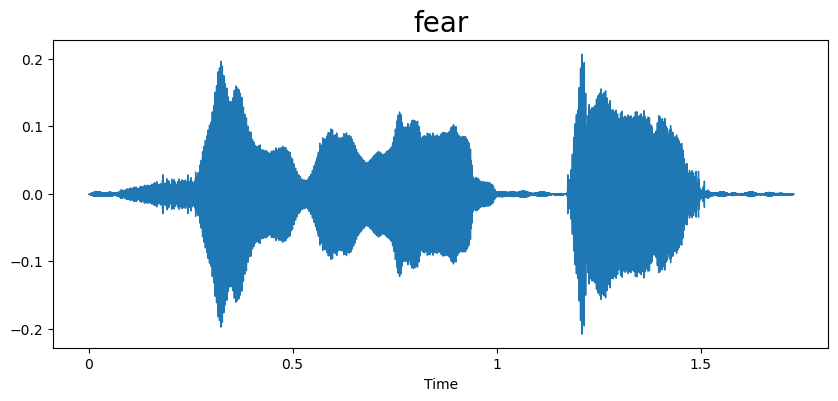

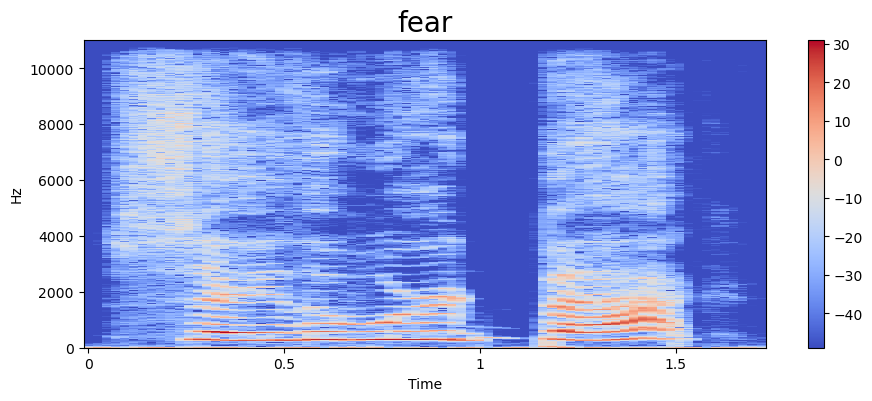

In [90]:
!pip install librosa
import numpy as np
import librosa
from IPython.display import Audio
import numpy as np
import matplotlib.pyplot as plt



emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Visualize the waveform
waveplot(data, sampling_rate, emotion)

# Visualize the spectrogram
spectrogram(data, sampling_rate, emotion)

# Play the audio
Audio(path)


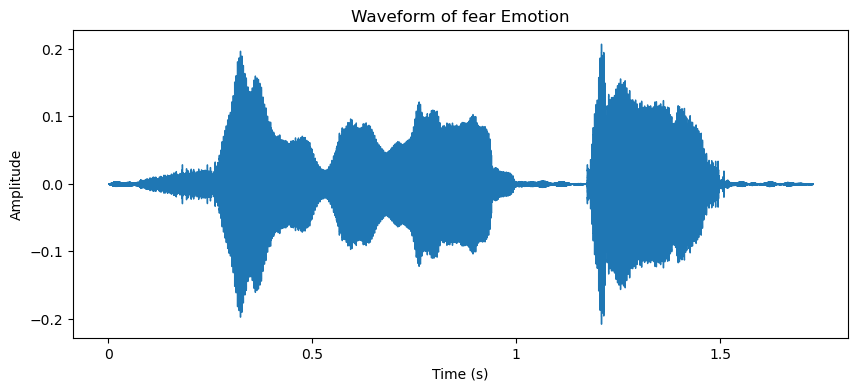

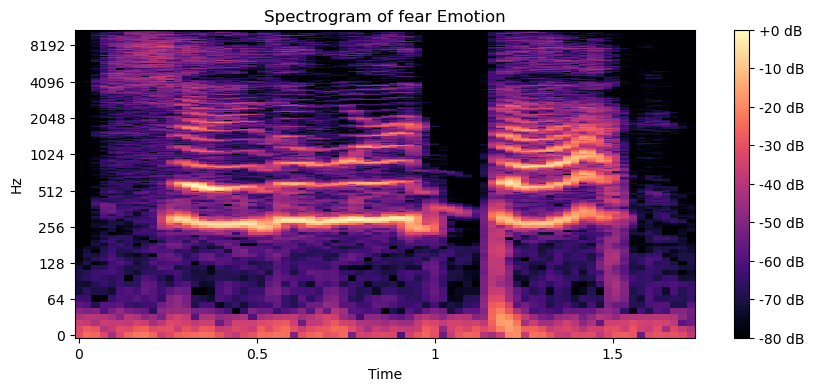

In [94]:
# Install the necessary libraries
!pip install librosa matplotlib

# Import required libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio


emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]

# Load the audio file
data, sampling_rate = librosa.load(path)

# Plot the waveform
def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Plot the spectrogram
def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

def play_audio(path):
    return Audio(path)

plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


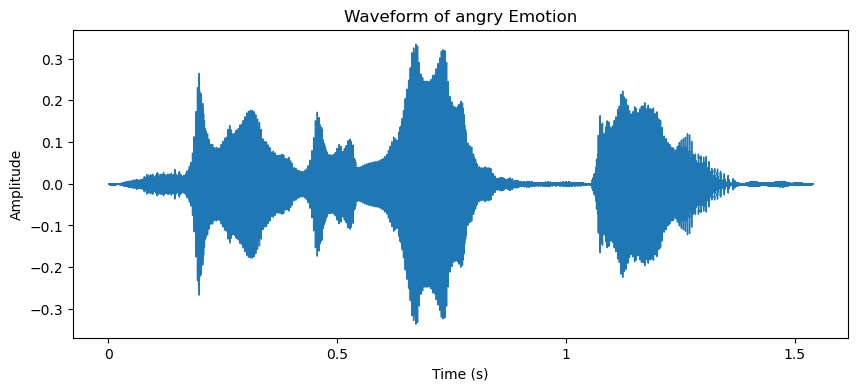

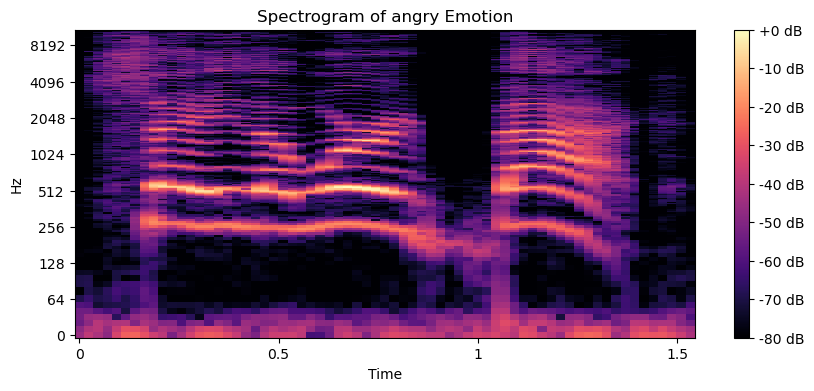

In [96]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

emotion = 'angry'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'angry' emotion
else:
    print("No audio data found for this emotion.")

# Load the audio file
data, sampling_rate = librosa.load(path)

# Define a function to plot the waveform
def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Define a function to plot the spectrogram
def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

# Play the audio
def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


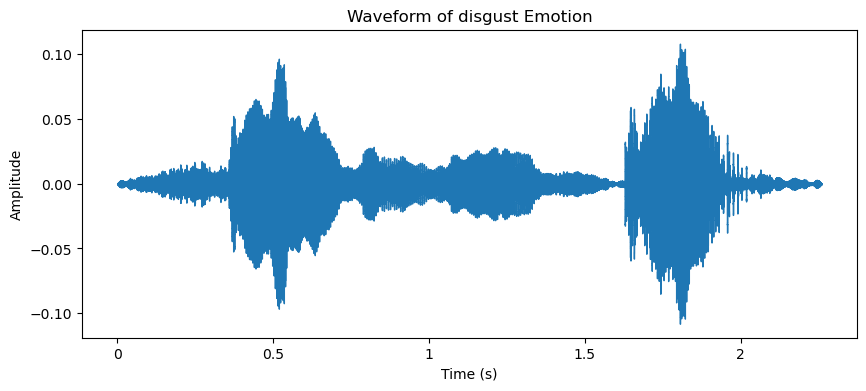

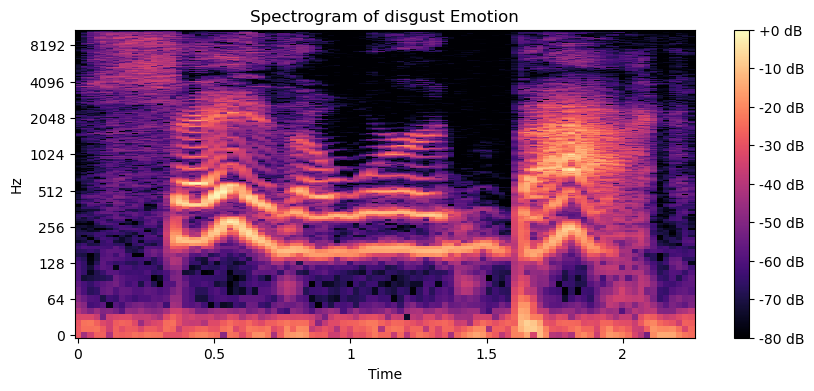

In [102]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio


emotion = 'disgust'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'disgust' emotion
else:
    print("No audio data found for this emotion.")

# Load the audio file
data, sampling_rate = librosa.load(path)

# Define a function to plot the waveform
def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

# Play the audio
def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


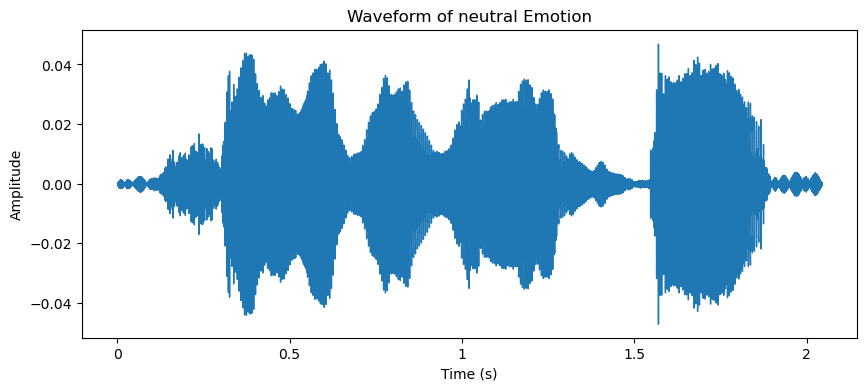

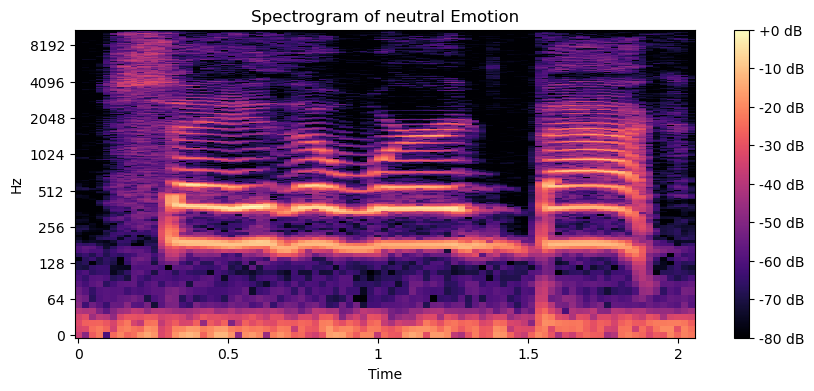

In [104]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

emotion = 'neutral'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'neutral' emotion
else:
    print("No audio data found for this emotion.")

# Load the audio file
data, sampling_rate = librosa.load(path)


def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()


def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

# Play the audio
def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


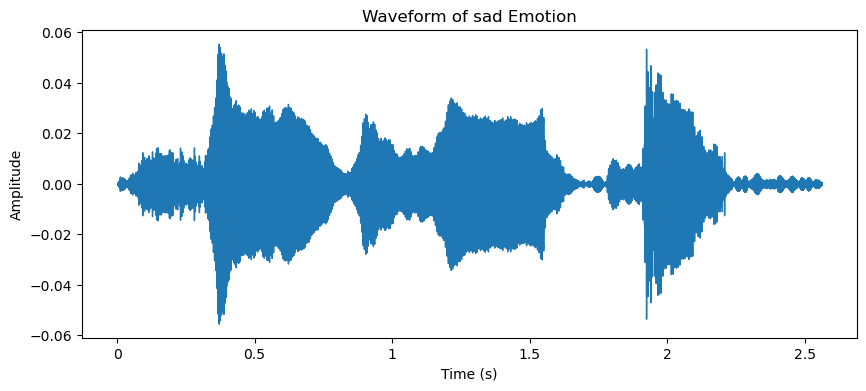

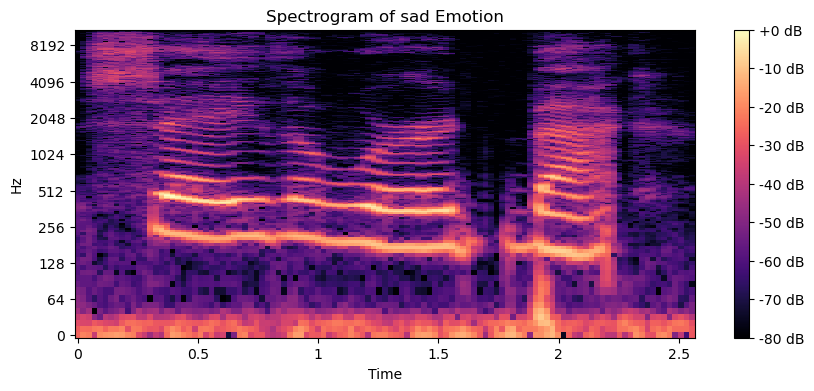

In [106]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

emotion = 'sad'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'sad' emotion
else:
    print("No audio data found for this emotion.")
    
# Load the audio file
data, sampling_rate = librosa.load(path)

def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Define a function to plot the spectrogram
def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

# Play the audio
def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


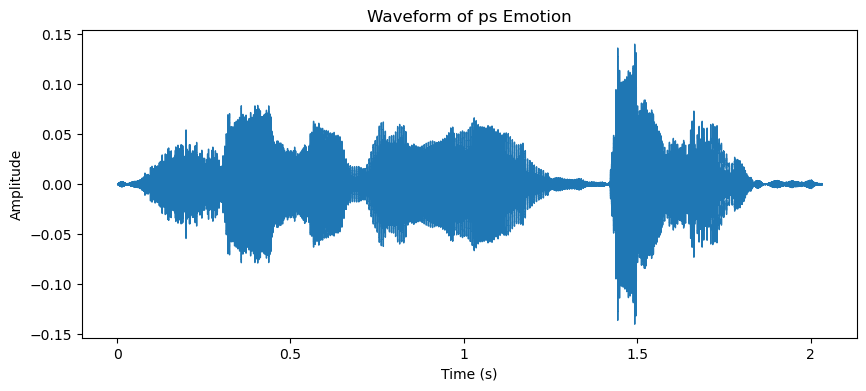

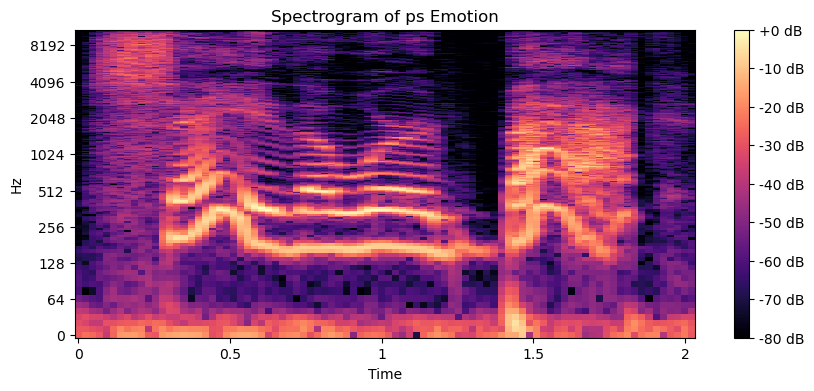

In [110]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

emotion = 'ps'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'ps' emotion
else:
    print("No audio data found for this emotion.") 

# Load the audio file
data, sampling_rate = librosa.load(path)

def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

# Play the audio
def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


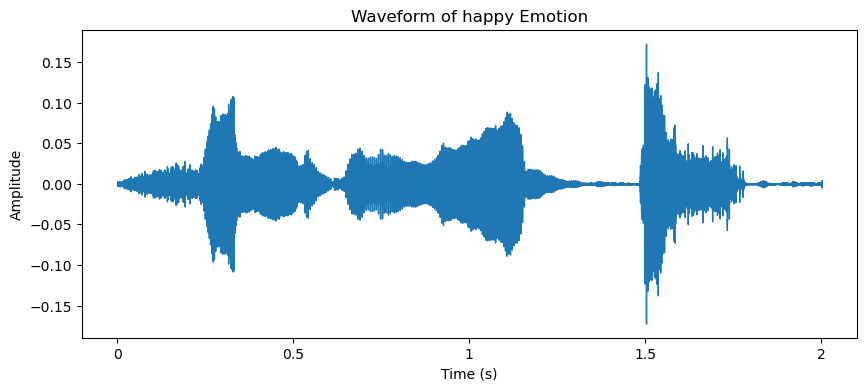

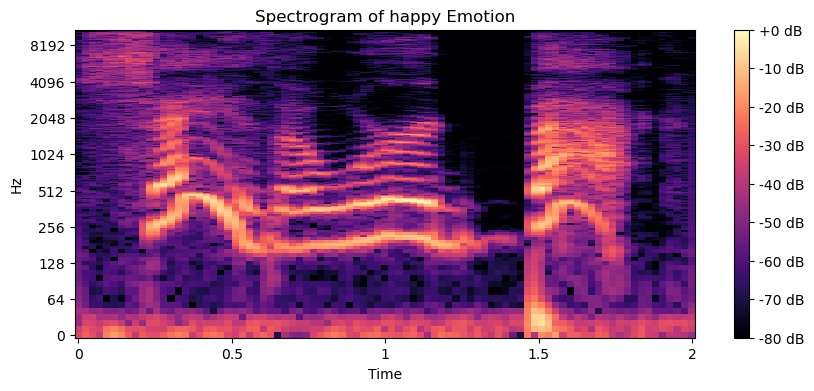

In [112]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

emotion = 'happy'

path = np.array(df['speech'][df['label'] == emotion])

if len(path) > 0:
    path = path[0]  # Use the first available path for the 'happy' emotion
else:
    print("No audio data found for this emotion.")
    
# Load the audio file
data, sampling_rate = librosa.load(path)

def plot_waveform(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(data, sr=sampling_rate)
    plt.title(f'Waveform of {emotion} Emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()
    
def plot_spectrogram(data, sampling_rate, emotion):
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)  # Short-time Fourier transform (STFT)
    librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {emotion} Emotion')
    plt.show()

def play_audio(path):
    return Audio(path)

# Visualize the waveform and spectrogram, and play the audio
plot_waveform(data, sampling_rate, emotion)
plot_spectrogram(data, sampling_rate, emotion)
play_audio(path)


In [114]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc
  extract_mfcc(df['speech'][0])

In [116]:
X_mfcc=df['speech'].apply(lambda x: extract_mfcc(x))

In [117]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.865501, 16.092943, 8....
                              ...                        
2795    [-553.2201, 89.83577, 27.215466, 16.407124, 19...
2796    [-589.23676, 96.20407, 36.96118, 15.014446, 28...
2797    [-533.41815, 85.43242, 27.791998, 19.307178, 2...
2798    [-548.6142, 110.16424, 31.91024, 12.572518, 22...
2799    [-549.2962, 102.374565, 32.268833, 26.261614, ...
Name: speech, Length: 2800, dtype: object

In [12]:
def augment_audio(path):
    audio, sr = librosa.load(path)
    
    pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=2)

    stretched = librosa.effects.time_stretch(audio, rate=1.2)
    
    noise = np.random.randn(len(audio)) * 0.005
    noisy_audio = audio + noise

    return [audio, pitch_shifted, stretched, noisy_audio]

augmented_data = augment_audio('output_directory/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav')


In [14]:
import librosa
import librosa.display
import numpy as np

def extract_features(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    
    combined_features = np.hstack((mfcc_mean, chroma_mean, spectral_contrast_mean))

    return combined_features

features = extract_features('output_directory/TESS Toronto emotional speech set data/OAF_angry/OAF_half_angry.wav')


In [16]:
import librosa
import librosa.display
import numpy as np

def extract_features(audio_path):
    # Load the audio file
    audio, sr = librosa.load(audio_path, sr=None)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    
    # Spectral contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
    
    mfcc_mean = np.mean(mfcc, axis=1)
    chroma_mean = np.mean(chroma, axis=1)
    spectral_contrast_mean = np.mean(spectral_contrast, axis=1)
    
    combined_features = np.hstack((mfcc_mean, chroma_mean, spectral_contrast_mean))

    return combined_features

# Example usage
features = extract_features('output_directory/TESS Toronto emotional speech set data/OAF_angry/OAF_half_angry.wav')
print(features) 


[-4.25917969e+02  4.95687981e+01 -1.67089119e+01 -2.03187370e+01
 -4.70111179e+00  8.60521793e+00 -1.69874592e+01  3.17920494e+00
 -5.26832962e+00 -1.07655442e+00 -7.34058905e+00  3.14420056e+00
  2.61223793e+00  5.75351000e-01  4.52396959e-01  3.09578389e-01
  2.92541802e-01  3.06686282e-01  3.03869188e-01  2.84679562e-01
  2.91855335e-01  3.02047133e-01  3.58177572e-01  4.08264309e-01
  4.98556405e-01  2.96506894e+01  2.30177245e+01  2.49168043e+01
  2.33268622e+01  2.16030442e+01  2.02609746e+01  1.95789802e+01]


In [3]:
import tensorflow as tf
from tensorflow.keras import layers

def create_hybrid_model(input_shape):
    model = tf.keras.Sequential()

    # Input layer (added as the first layer in the model)
    model.add(layers.InputLayer(input_shape=input_shape))

    # CNN for feature extraction
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    
    # Adding more layers for deeper feature extraction
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))

    # Flatten the feature maps before passing to LSTM or Dense layers
    model.add(layers.Flatten())

    # Check the shape of the output after flattening to decide reshaping
    model.summary()

    # add dense layers for classification after flattening
    model.add(layers.Dense(128, activation='relu'))  # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))  

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model
    
model = create_hybrid_model((128, 128, 1))
model.summary()


C:\Users\somes\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,400,390 (28.23 MB)

 Trainable params: 7,400,390 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

def create_hybrid_model(input_shape):
    model = tf.keras.Sequential()
    
    # CNN for feature extraction (TimeDistributed if sequential data)
    model.add(layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(layers.TimeDistributed(layers.MaxPooling2D(2, 2)))
    
    model.add(layers.TimeDistributed(layers.Conv2D(64, (3, 3), activation='relu')))
    model.add(layers.TimeDistributed(layers.MaxPooling2D(2, 2)))
    
    # Flatten the feature maps
    model.add(layers.TimeDistributed(layers.Flatten()))
    
    # LSTM for temporal sequence processing
    model.add(layers.LSTM(128, return_sequences=False))
    
    # Fully connected layers for classification
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))  # 6 classes (emotions)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
    
model = create_hybrid_model((None, 128, 128, 1))
model.summary()



C:\Users\somes\anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, None, 126, 126, 32)  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, None, 63, 63, 32)    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, None, 61, 61, 64)    │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, None, 30, 30, 64)    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, None, 57600)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │      29,557,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,584,710 (112.86 MB)

 Trainable params: 29,584,710 (112.86 MB)

 Non-trainable params: 0 (0.00 B)